# Training a Neural Network for Computer Model Emulation

### Import necessary libraries 

In [1]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from calculations_load import *
from configurations import *

Using idf = 0 : Grad
SystemsInfo = 
{'Pb-Pb-2760': {'proj': 'Pb', 'targ': 'Pb', 'sqrts': 2760, 'main_design_file': 'production_designs/500pts/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat', 'main_range_file': 'production_designs/500pts/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat', 'validation_design_file': 'production_designs/500pts/design_pts_Pb_Pb_2760_production/design_points_validation_PbPb-2760.dat', 'validation_range_file': 'production_designs/500pts/design_pts_Pb_Pb_2760_production//design_ranges_validation_PbPb-2760.dat', 'main_events_dir': 'model_calculations/production_500pts_Pb_Pb_2760/Events/main', 'validation_events_dir': 'model_calculations/production_500pts_Pb_Pb_2760/Events/validation', 'main_obs_file': 'model_calculations/production_500pts_Pb_Pb_2760/Obs/main.dat', 'validation_obs_file': 'model_calculations/production_500pts_Pb_Pb_2760/Obs/validation.dat', 'n_design': 500, 'n_validation': 100, 'design_remove_idx': [289, 483, 32

In [4]:
#prepare the directories for model design and outputs
#run this cell only once, or else it will hang!
#! sh prepare.sh

### Loading Computer Model inputs and outputs

In [5]:
system_str = 'Pb-Pb-2760'
design_file = 'production_designs/500pts/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat'
design = pd.read_csv(design_file)
design = design.drop("idx", axis=1)

#delete bad design points
drop_indices = list(delete_design_pts_set)
design = design.drop(drop_indices)

#choose features (inputs)
#feature_cols = ['norm', 'trento_p'] #specific choices
feature_cols = design.keys().values #all of them 
n_features = len(feature_cols)

X = design[feature_cols]

n_design = SystemsInfo["Pb-Pb-2760"]["n_design"]
npt = n_design - len(delete_design_pts_set)
obs = 'dNch_deta' #choose the observable we want to emulate

Y = np.array([])

for pt in range(npt):
    for obs in active_obs_list['Pb-Pb-2760']:
        Y = np.append( Y, trimmed_model_data[system_str][pt, idf][obs]['mean'][:], axis=0)
        
Y = Y.reshape(X.shape[0], -1)

In [6]:
print( "X.shape : "+ str(X.shape) )
print( "Y.shape : "+ str(Y.shape) )

X.shape : (485, 17)
Y.shape : (485, 110)


## Splitting the inputs and outputs into a training and testing set

Then, scaling all of the inputs and outputs to (0, 1)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

#X_scaler = StandardScaler().fit(X_train)
#Y_scaler = StandardScaler().fit(Y_train)
X_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
Y_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(Y_train)

X_train_sc = X_scaler.transform(X_train)
X_test_sc = X_scaler.transform(X_test)

Y_train_sc = Y_scaler.transform(Y_train)
Y_test_sc = Y_scaler.transform(Y_test)

### The cell below constructs the neural network

In [8]:
n_hidden = 2 # number of hidden layers

model = keras.Sequential()
model.add(layers.Dense(20, input_dim=X.shape[1], activation='tanh'))
for n in range(n_hidden):
    model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(Y.shape[1], activation='tanh'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [10]:
model.fit(X_train_sc, Y_train_sc, epochs=300, batch_size=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
388/388 [==============================] - 0s 626us/sample - loss: 0.2242 - acc: 0.0077
Epoch 2/300
388/388 [==============================] - 0s 107us/sample - loss: 0.1935 - acc: 0.0129
Epoch 3/300
388/388 [==============================] - 0s 120us/sample - loss: 0.1643 - acc: 0.0387
Epoch 4/300
388/388 [==============================] - 0s 111us/sample - loss: 0.1291 - acc: 0.0619
Epoch 5/300
388/388 [==============================] - 0s 104us/sample - loss: 0.0973 - acc: 0.0928
Epoch 6/300
388/388 [==============================] - 0s 114us/sample - loss: 0.0754 - acc: 0.0954
Epoch 7/300
388/388 [==============================] - 0s 102us/sample - loss: 0.0606 - acc: 0.1082
Epoch 8/300
388/388 [==============================] - 0s 109us/sample - loss: 0.0503 - acc: 0.1314
Epoch 9/300
388/388 [==============================] - 0s 92us/sample - loss: 0.0441 - acc: 0.1649
Epoch 10/300
388/388 [==============================]

Epoch 80/300
388/388 [==============================] - 0s 95us/sample - loss: 0.0152 - acc: 0.4098
Epoch 81/300
388/388 [==============================] - 0s 93us/sample - loss: 0.0152 - acc: 0.3943
Epoch 82/300
388/388 [==============================] - 0s 108us/sample - loss: 0.0150 - acc: 0.3995
Epoch 83/300
388/388 [==============================] - 0s 92us/sample - loss: 0.0151 - acc: 0.3995
Epoch 84/300
388/388 [==============================] - 0s 95us/sample - loss: 0.0150 - acc: 0.4046
Epoch 85/300
388/388 [==============================] - 0s 90us/sample - loss: 0.0150 - acc: 0.4124
Epoch 86/300
388/388 [==============================] - 0s 91us/sample - loss: 0.0148 - acc: 0.4072
Epoch 87/300
388/388 [==============================] - 0s 97us/sample - loss: 0.0148 - acc: 0.3918
Epoch 88/300
388/388 [==============================] - 0s 87us/sample - loss: 0.0147 - acc: 0.4175
Epoch 89/300
388/388 [==============================] - 0s 87us/sample - loss: 0.0146 - acc: 0.4124

388/388 [==============================] - 0s 89us/sample - loss: 0.0110 - acc: 0.4459
Epoch 162/300
388/388 [==============================] - 0s 93us/sample - loss: 0.0110 - acc: 0.4485
Epoch 163/300
388/388 [==============================] - 0s 91us/sample - loss: 0.0109 - acc: 0.4381
Epoch 164/300
388/388 [==============================] - 0s 93us/sample - loss: 0.0109 - acc: 0.4433
Epoch 165/300
388/388 [==============================] - 0s 86us/sample - loss: 0.0109 - acc: 0.4381
Epoch 166/300
388/388 [==============================] - 0s 91us/sample - loss: 0.0109 - acc: 0.4459
Epoch 167/300
388/388 [==============================] - 0s 93us/sample - loss: 0.0108 - acc: 0.4459
Epoch 168/300
388/388 [==============================] - 0s 87us/sample - loss: 0.0109 - acc: 0.4407
Epoch 169/300
388/388 [==============================] - 0s 87us/sample - loss: 0.0107 - acc: 0.4407
Epoch 170/300
388/388 [==============================] - 0s 87us/sample - loss: 0.0107 - acc: 0.4433
Epoc

388/388 [==============================] - 0s 87us/sample - loss: 0.0088 - acc: 0.4588
Epoch 243/300
388/388 [==============================] - 0s 94us/sample - loss: 0.0088 - acc: 0.4588
Epoch 244/300
388/388 [==============================] - 0s 92us/sample - loss: 0.0089 - acc: 0.4665
Epoch 245/300
388/388 [==============================] - 0s 89us/sample - loss: 0.0087 - acc: 0.4562
Epoch 246/300
388/388 [==============================] - 0s 97us/sample - loss: 0.0087 - acc: 0.4588
Epoch 247/300
388/388 [==============================] - 0s 86us/sample - loss: 0.0088 - acc: 0.4742
Epoch 248/300
388/388 [==============================] - 0s 86us/sample - loss: 0.0087 - acc: 0.4639
Epoch 249/300
388/388 [==============================] - 0s 90us/sample - loss: 0.0087 - acc: 0.4716
Epoch 250/300
388/388 [==============================] - 0s 89us/sample - loss: 0.0086 - acc: 0.4613
Epoch 251/300
388/388 [==============================] - 0s 89us/sample - loss: 0.0086 - acc: 0.4742
Epoc

In [11]:
predictions = model.predict(X_test_sc)

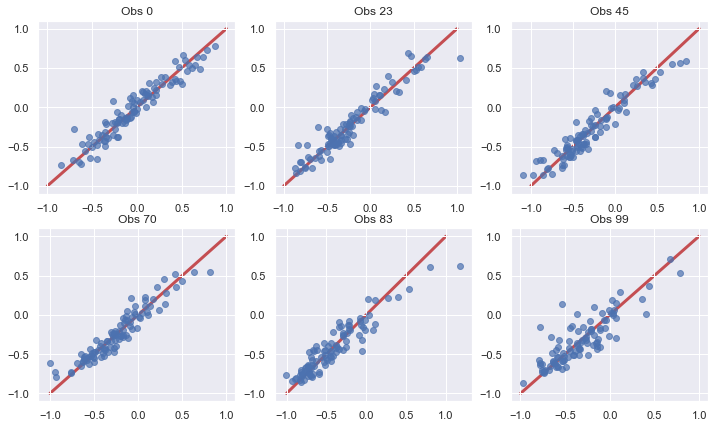

In [21]:
truth = np.linspace(-1, 1, 100)
obs_indices = [0, 23, 45, 70, 83, 99]

fig, axes = plt.subplots(2, 3, figsize=(12, 7))
for i, obs_ind in enumerate(obs_indices):
    ax = axes.flatten()[i]
    ax.set_title("Obs " + str(obs_ind))
    ax.plot(truth, truth, c='r', lw=3, zorder=-1)
    ax.scatter(Y_test_sc[:, obs_ind], predictions[:, obs_ind], alpha=0.7, zorder=1)